In [1]:
%matplotlib inline

import prtools as pr
import pandas as pd
import numpy as np

import seaborn as sns

## Data Setup

In [2]:
# Data Setup
def gen_data(N=40):
    x = np.random.uniform(low=0., high=1., size=N)
    y = x + np.random.standard_normal(size=N)
    
    return x, y, pr.gendatr(x[:, None], y[:, None])

In [9]:
x, y, dataset = gen_data(N=2)
x_test, y_test, data_test = gen_data(N=1000)

## Ridge regression (L2 Norm)

1.0453541528536814


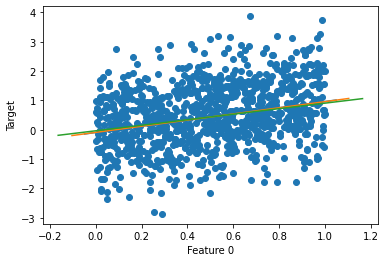

In [37]:
ʎ = .1
model = pr.ridger(dataset, ʎ)
model2 = pr.ridger(dataset, 0.5)
model3 = pr.ridger(dataset, 7)
print(data_test * model * pr.testr())
pr.scatterr(data_test)
pr.plotr(model)
pr.plotr(model2)
pr.plotr(model3)

In [20]:
models_n_2 = [pr.ridger(dataset, ʎ) for ʎ in np.arange(1e-2, 1e2, 10)]

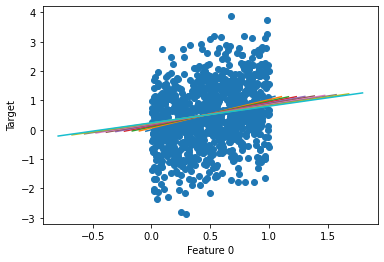

In [21]:
pr.scatterr(data_test)
[pr.plotr(m) for m in models_n_2];

### What if the test set was larger

In [22]:
x, y, dataset = gen_data(N=700)

In [29]:
models_n_700 = [pr.ridger(dataset, ʎ) for ʎ in np.arange(1e-2, 1e2, 15)]

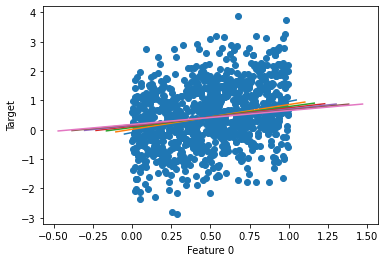

In [30]:
pr.scatterr(data_test)
[pr.plotr(m) for m in models_n_700];

The higher the regularization term, the flatter is the fit line. This is due to the fact that the regularisation term aids in reducing the magnitude of the weights and in doing so prevents the model from fitting too closely to the data as the $\lambda$ goes on increasing the weights are penalised more and conform less and less to the data leading to a fit line that is flatter and doesn't really fit to the data. This is is useful when the classifier seems to be overfitting, in this case the regularisation term can reduce the magnitude of the weights and prevent the classifier from conforming to the data too strongly.

## Section 3.3 LASSO Regression (L1 Norm)

Another way of regularizing that is popular is through an L1 norm instead of the L2 norm.
This leads to the so-called least absolute shrinkage and selection operator or LASSO for short.
What is nice about the LASSO is that it often also results in a selection of features (feature
selection is also implemented through some other approaches as we will see later). That is, it
automatically leads to a reduction of the number of features that the final regressor depends
on. Here, we investigate that behavior a bit.

In [38]:
def gen_data2(N=20):
    x = np.random.standard_normal(size=N)
    y = x + np.random.standard_normal(size=N)/5
    
    return x, y, pr.gendatr(x[:, None], y[:, None])

In [39]:
x, y, dataset = gen_data2()

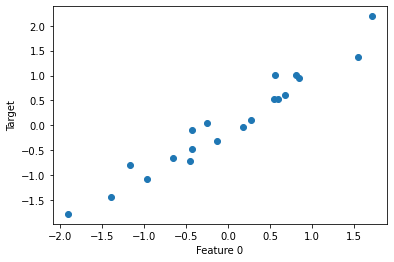

In [40]:
pr.scatterr(dataset)

Technically none of the weights should ever turn to 0 for smaller $\lambda$ values but as the $\lambda$ value goes on growing larger and larger the values in the $W$ vector should shrink more and more and essentially tend to $0$ for very large $\lambda$ 

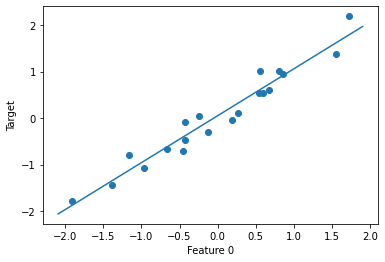

In [41]:
model = pr.ridger(dataset, 0.1)
pr.scatterr(dataset)
pr.plotr(model)

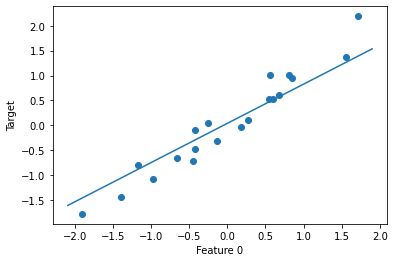

In [42]:
model = pr.ridger(dataset, 5)
pr.scatterr(dataset)
pr.plotr(model)

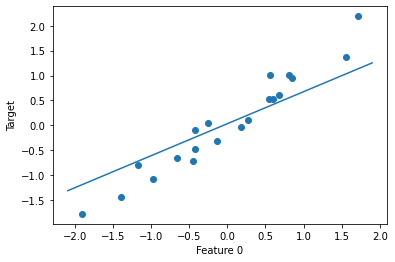

In [45]:
model = pr.ridger(dataset, 10)
pr.scatterr(dataset)
pr.plotr(model)

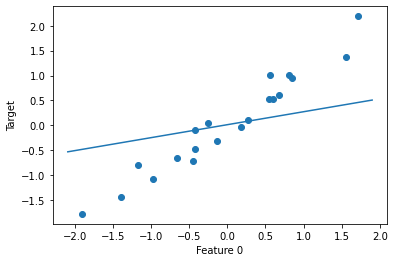

In [46]:
model = pr.ridger(dataset, 50)
pr.scatterr(dataset)
pr.plotr(model)

As we can see as the $\lambda$ value goes up, the weights are tending to $0$ but they never truly become zero. Maybe at extremely high values of $\lambda$.

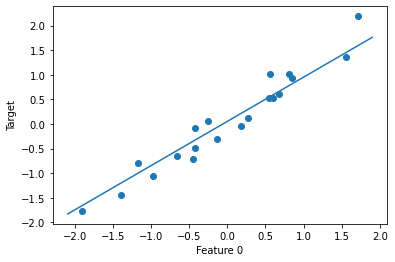

In [49]:
model_l = pr.lassor(dataset, 0.1)
pr.scatterr(dataset)
pr.plotr(model_l)

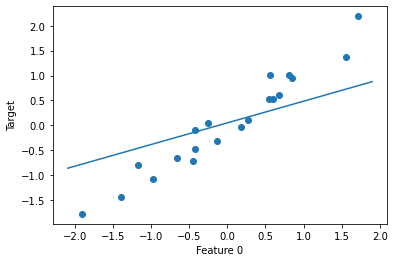

In [50]:
model_l = pr.lassor(dataset, 0.5)
pr.scatterr(dataset)
pr.plotr(model_l)

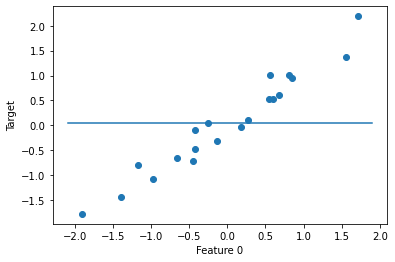

In [51]:
model_l = pr.lassor(dataset, 1)
pr.scatterr(dataset)
pr.plotr(model_l)

As we can see in Lasso regression, the weights are shrunk quite rapidly and actually taking the value $0$ therefore we can see a horizontal line at $y=0$.

## 3.4 Hypothesis Classes and (Surrogate) Losses

In an attempt to develop a general approach to machine learning, a learning problem may
be defined in somewhat abstract terms as consisting out of four components. Next to the
training data sets D, we have a hypothesis class H, which is the set of all possible models
that are considered, a loss, which is a function that tells us how well a hypothesis $h ∈ H$ fits
the data D, and a regularization term. The assumption then is that, what we are looking for,
is the hypothesis from H that minimizes the loss on the training data.

## 3.7 Sources of Variation

In [10]:
t = pr.gendath([500, 500])
err = []
for i in range(30):
    a = pr.gendath([20, 20])
    err.append(t * pr.ldc(a) * pr.testc())
    
err

[0.216,
 0.175,
 0.209,
 0.199,
 0.227,
 0.242,
 0.18,
 0.211,
 0.166,
 0.135,
 0.191,
 0.174,
 0.225,
 0.173,
 0.168,
 0.243,
 0.213,
 0.171,
 0.173,
 0.162,
 0.189,
 0.184,
 0.176,
 0.229,
 0.167,
 0.221,
 0.145,
 0.177,
 0.233,
 0.195]

<AxesSubplot:>

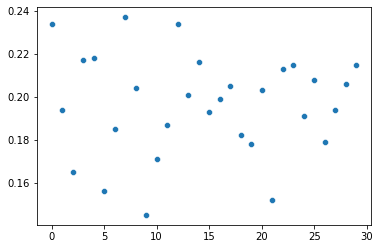

In [8]:
sns.scatterplot(x=range(30), y=err)

Each time we draw a new training set, so the variation is error is caused by the change in the training set.

In [11]:
t = pr.gendath([20, 20])
err2 = []
for i in range(30):
    a = pr.gendath([500, 500])
    err2.append(t * pr.ldc(a) * pr.testc())
    
err2

[0.1,
 0.1,
 0.125,
 0.1,
 0.125,
 0.1,
 0.15,
 0.1,
 0.125,
 0.1,
 0.1,
 0.125,
 0.1,
 0.1,
 0.125,
 0.125,
 0.15,
 0.1,
 0.1,
 0.1,
 0.125,
 0.15,
 0.1,
 0.1,
 0.1,
 0.125,
 0.1,
 0.1,
 0.15,
 0.1]

<AxesSubplot:>

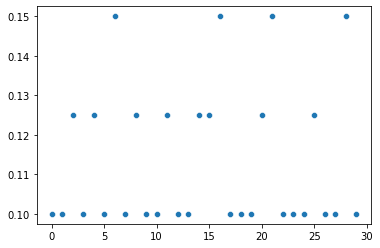

In [12]:
sns.scatterplot(x=range(30), y=err2)

This effect comes from the undertraining of the classifier as well as the generation of the new data each time but with the test set being much larger the variation is much less as well.

## 3.8 Learning Curves

The function cleval allows you to calculate so-called learning curves. These are curves that
plot classification errors against the number of points in the training data set. (Check help
cleval for the details.)
In this section we are going to study some learning curves for different data sets and different
classifiers. Some of the plots and number that will be generated demonstrate certain salient
and/or noteworthy behavior.
After reading a question, and before just implementing the things to be implemented, try to
think about the outcome to be expected. Eventually, say at the end of this course, you should
not be surprised by many of these things anymore!

In [31]:
data = pr.gendath(n=(1000, 1000))

In [33]:
noise = np.random.uniform(-1, 1, (2000, 60))

In [34]:
X = np.concatenate((data.data, noise), axis=1)

In [35]:
data = pr.prdataset(X, data.targets)

In [36]:
data.data.shape

(2000, 62)

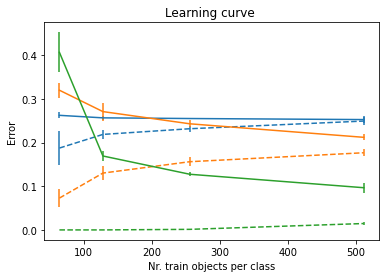

In [47]:
clevals = [pr.cleval(data, getattr(pr, u)(), trainsize=[64, 128, 256, 512]) for u in ['nmc', 'ldc', 'qdc']]

Blue -> nmc

Orange -> ldc

Green -> qdc

nmc and ldc both have higher errors even as the training set size increases due to their linear nature, they aren't able to fully model the data and therefore have higher error rates than that of the qdc which due to its non-linear nature is able to model high dimensional data more effectively.

none of them are the best really, qdc is just better in this case as the dimensions are higher. simpler classifiers are better for simpler data.

The test curves go down and the training curves go up and eventually converge at some point, for the qdc this convergence would happen later as it would seemlingly need more data.

(array([[0.02564103, 0.01923077, 0.03311966],
        [0.02236239, 0.02178899, 0.02981651],
        [0.02620968, 0.02553763, 0.02889785],
        [0.02561475, 0.02151639, 0.02766393]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]))

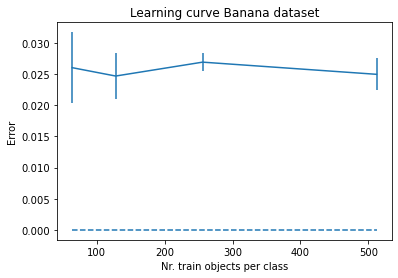

In [49]:
# taking the same data set for the knn classifier
pr.cleval(pr.gendatb(n=(1000, 1000)), pr.knnc(), trainsize=[64, 128, 256, 512])

Wow the error is really close to $0$ why though?

### 3.8.4

Like learning curves that typically plot the classification error against the number of training
set samples, making feature curves can also be informative.
The latter studies how the
classification error varies with varying number of feature dimensionality.
We can use the
clevalf command to perform such study.

#### 3.19

In [54]:
xs = np.loadtxt("mfeat-kar")

In [79]:
ys = np.array([[i] * 200 for i in range(10)]).reshape(-1, 1)

In [109]:
def gen_dat3(dim=4):
    xsd = pr.prdataset(xs[:, :dim], targets=ys)
    return xsd

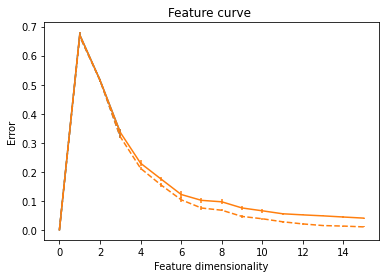

In [111]:
pr.clevalf(gen_dat3(dim=4), pr.qdc(), trainsize=.5);

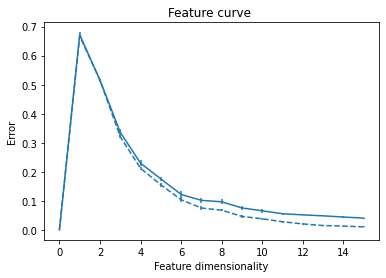

In [110]:
pr.clevalf(gen_dat3(dim=16), pr.qdc(), trainsize=.5);

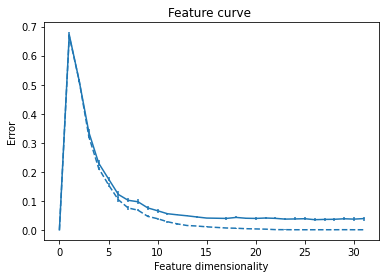

In [112]:
pr.clevalf(gen_dat3(dim=32), pr.qdc(), trainsize=.5);

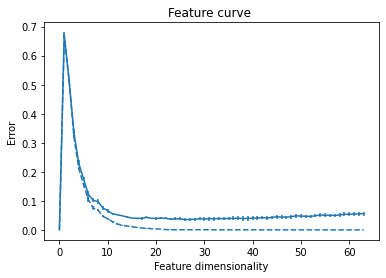

In [114]:
pr.clevalf(gen_dat3(dim=64), pr.qdc(), trainsize=.5);

I might not expect the same curve but a similar shape of the curve is certainly expected. There might be minor changes but I largely expect the same shape as the training set isn't really changing.

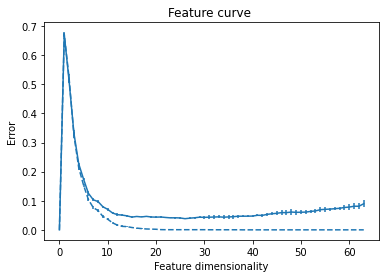

In [115]:
# 40pc training data
pr.clevalf(gen_dat3(dim=64), pr.qdc(), trainsize=.4);

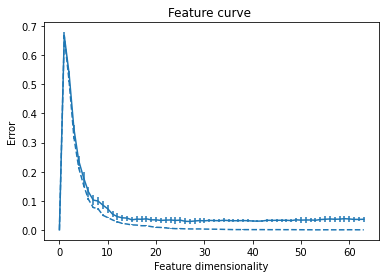

In [116]:
# 80pc training data
pr.clevalf(gen_dat3(dim=64), pr.qdc(), trainsize=.8);

The test error seems to have climbed up towards the end. This is likely due to the overfitting on the data.

## 3.9 Cross-Validation

### 3.20

In [27]:
N = 10
data = pr.gendatb(n=(N, N))

In [28]:
err = pr.prcrossval(data, pr.knnc(), k=10, nrrep=10)

In [29]:
#  over the flattened array
err.std(), err.var()

(0.281913107180209, 0.079475)

In [5]:
err

array([[0.  , 0.04, 0.04, 0.01, 0.01, 0.  , 0.03, 0.03, 0.01, 0.01],
       [0.05, 0.04, 0.01, 0.02, 0.03, 0.05, 0.04, 0.05, 0.  , 0.04],
       [0.02, 0.01, 0.02, 0.03, 0.04, 0.02, 0.  , 0.03, 0.03, 0.03],
       [0.03, 0.02, 0.04, 0.01, 0.01, 0.03, 0.02, 0.01, 0.02, 0.03],
       [0.  , 0.02, 0.01, 0.02, 0.02, 0.04, 0.06, 0.03, 0.05, 0.03],
       [0.02, 0.02, 0.03, 0.03, 0.01, 0.03, 0.02, 0.03, 0.02, 0.03],
       [0.04, 0.01, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.03, 0.03],
       [0.01, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.02],
       [0.03, 0.03, 0.03, 0.05, 0.01, 0.04, 0.01, 0.  , 0.05, 0.02],
       [0.02, 0.01, 0.02, 0.02, 0.03, 0.01, 0.01, 0.03, 0.01, 0.01]])

<AxesSubplot:>

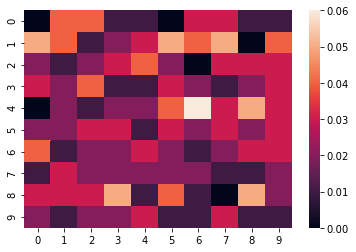

In [6]:
sns.heatmap(err)

The error rates always lie between $[0-1.]$ that too the most commonly occuring value seems to be $.5$ every now and then when $N=10$. It seems that the $\sigma$ decreases slightly as the number of samples goes up but then also reduces bias

### 3.21

In [30]:
data = pr.gendatb(n=(1000, 1000))

In [40]:
w = pr.parzenm(+data)

In [39]:
w

prmapping(Parzen density+Bayes rule,untrained)

## 3.10 The Confusion Matrix

In [41]:
data = pr.gendatb()

In [42]:
test_data = pr.gendatb(100, 100)

In [47]:
lab = data.targets

In [43]:
w = pr.fisherc(data)

In [48]:
lab2 = test_data * w * pr.labeld()

In [49]:
#  no confmat function
pr.conf

array([[-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [ 1],
       [-1],
       [-1],
       [-1],
       [-1],